<a href="https://colab.research.google.com/github/yankit247/Exploratory_Data_Analysis/blob/main/Exploratory_data_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("data.csv")

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float

In [ ]:
# Display summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000

In [ ]:
# Display the top and bottom rows
print("\nTop 5 rows:")
print(df.head())
print("\nBottom 5 rows:")
print(df.tail())


Top 5 rows:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Comp

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size']
df = df.drop(columns=columns_to_drop)

# Display unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")


Unique Values in Categorical Columns:
Make: ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model: ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series'

In [ ]:
# Rename columns
column_mapping = {
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
}
df = df.rename(columns=column_mapping)

In [ ]:
# Display data shape
print("\nData shape:", df.shape)

# Display missing value count before and after dropping
print("\nMissing values before dropping:", df.isnull().sum())
df = df.dropna()
print("Missing values after dropping:", df.isnull().sum())


Data shape: (11914, 10)

Missing values before dropping: Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64
Missing values after dropping: Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


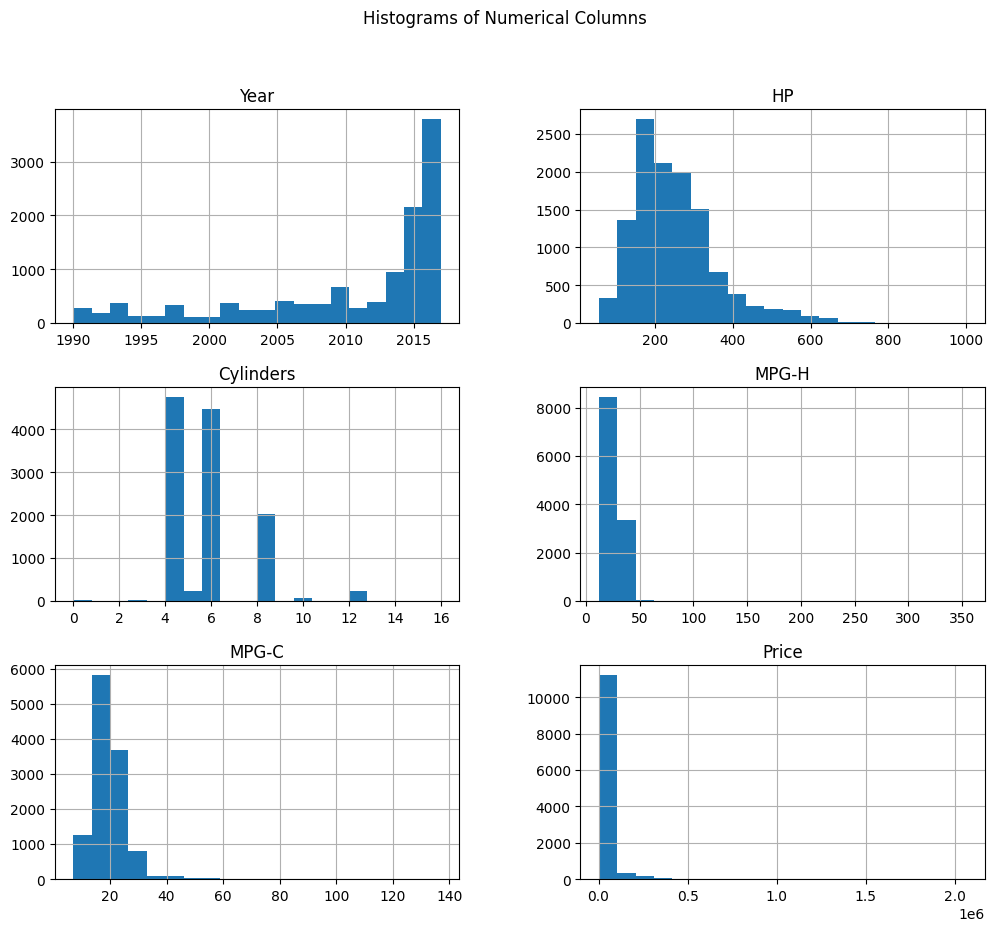

In [ ]:
# Visualize data using histograms
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Columns")
plt.show()

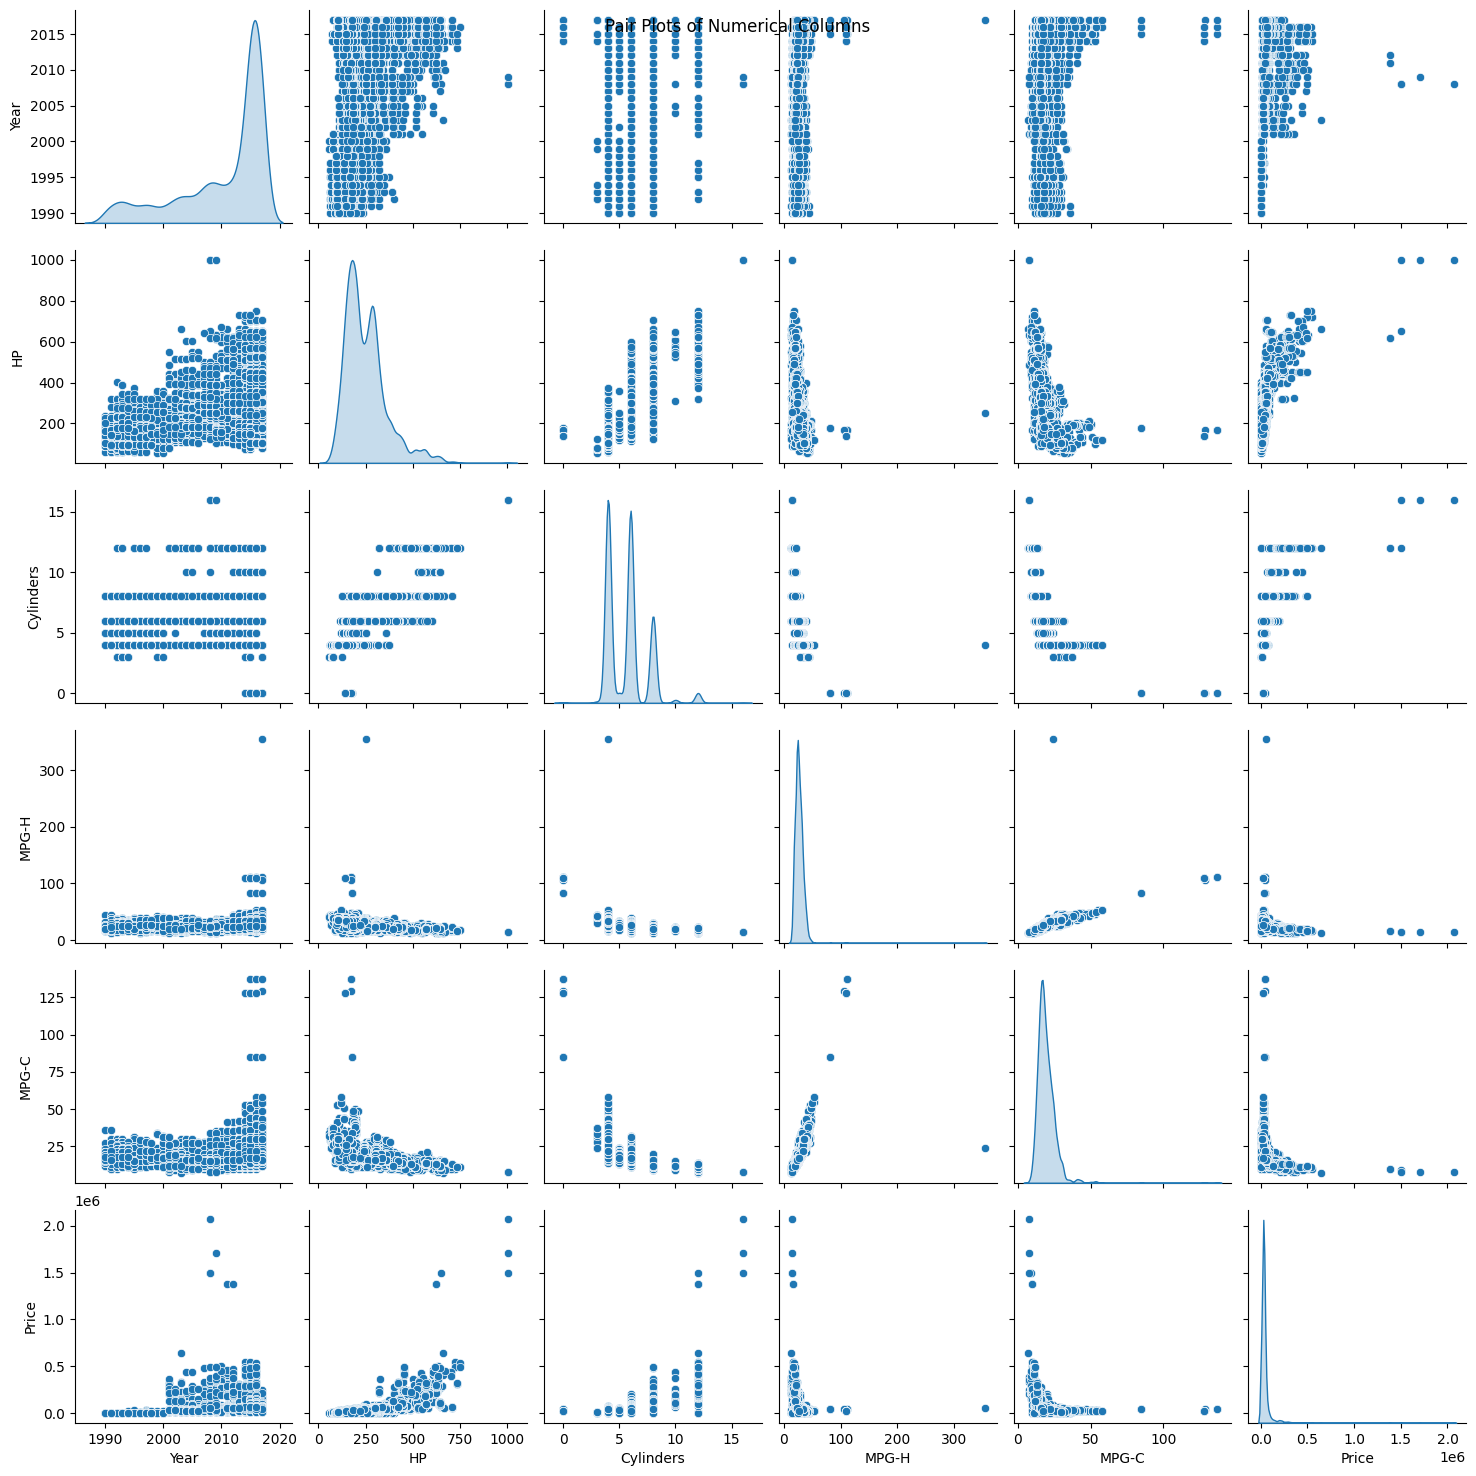

In [ ]:
# Visualize data using pair plots
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plots of Numerical Columns")
plt.show()

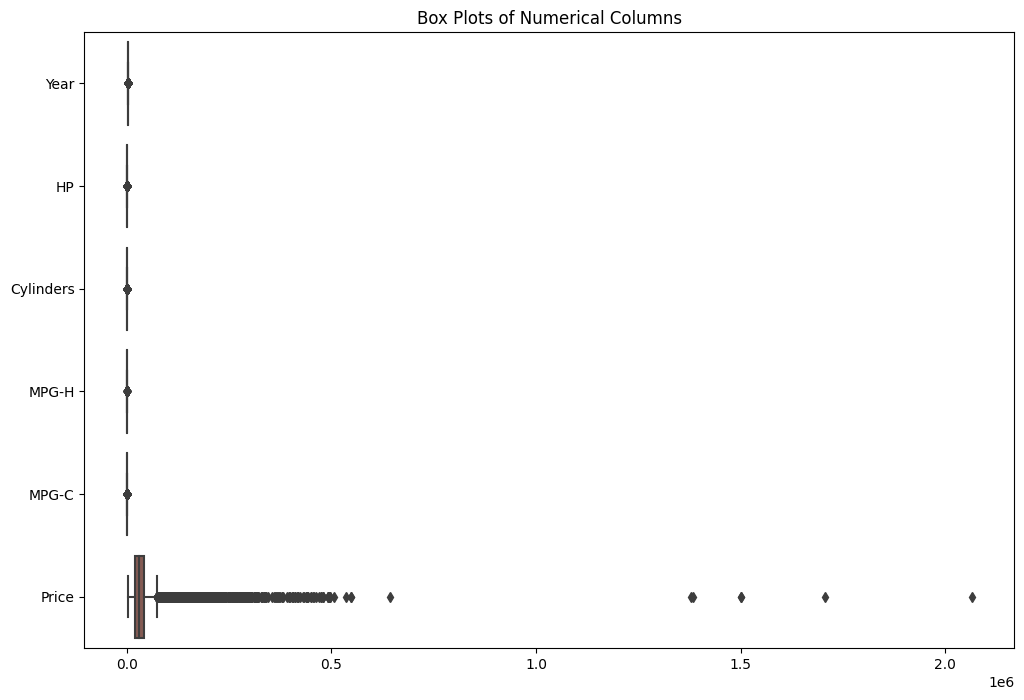

In [ ]:
# Visualize data using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Numerical Columns')
plt.show()

In [ ]:
# Identify and remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-12-efd1ff737518>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-12-efd1ff737518>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-12-efd1ff737518>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


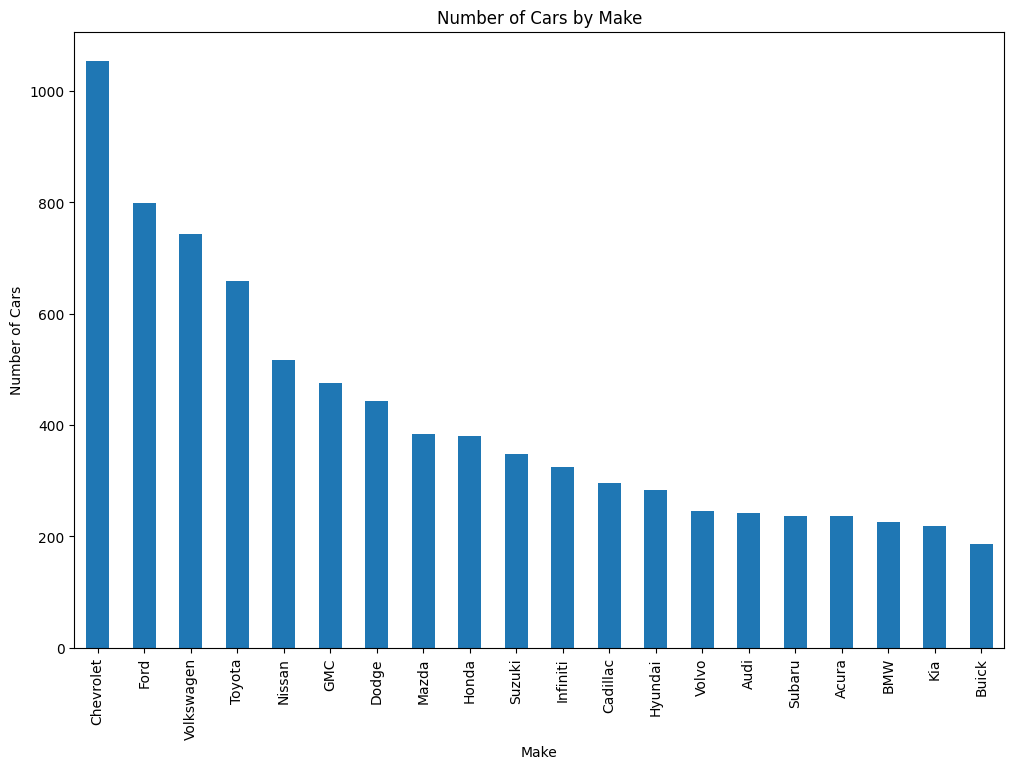

In [ ]:
# Visualize car counts by make
plt.figure(figsize=(12, 8))
df['Make'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Number of Cars by Make")
plt.ylabel('Number of Cars')
plt.xlabel('Make')
plt.show()


<ipython-input-14-020bcaf4b84a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


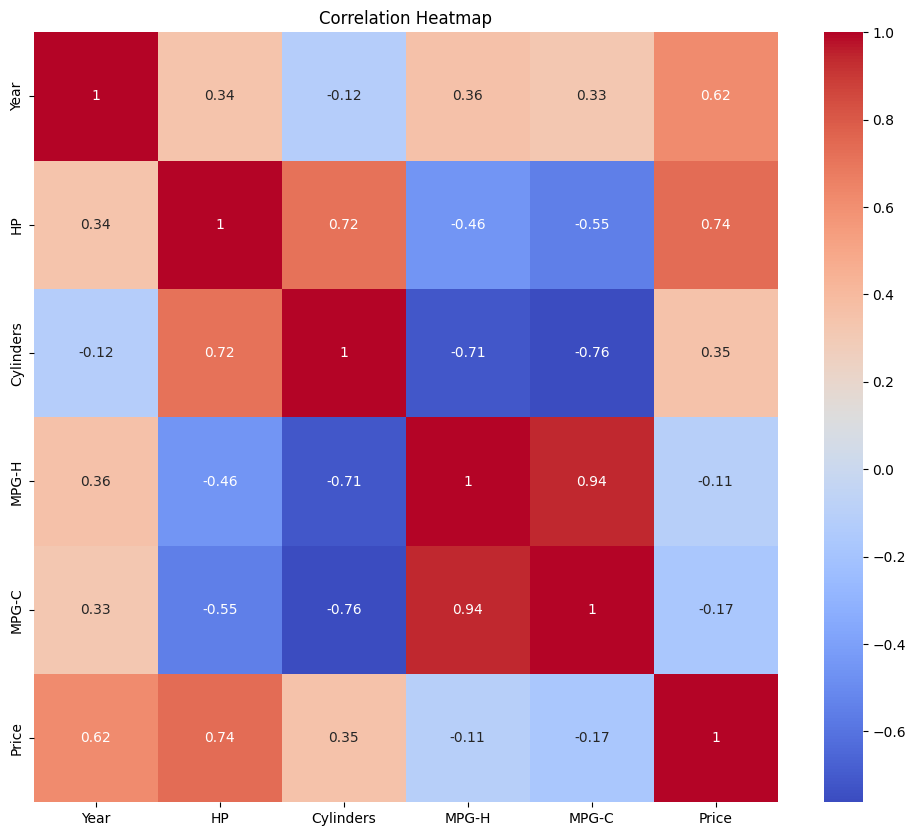

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


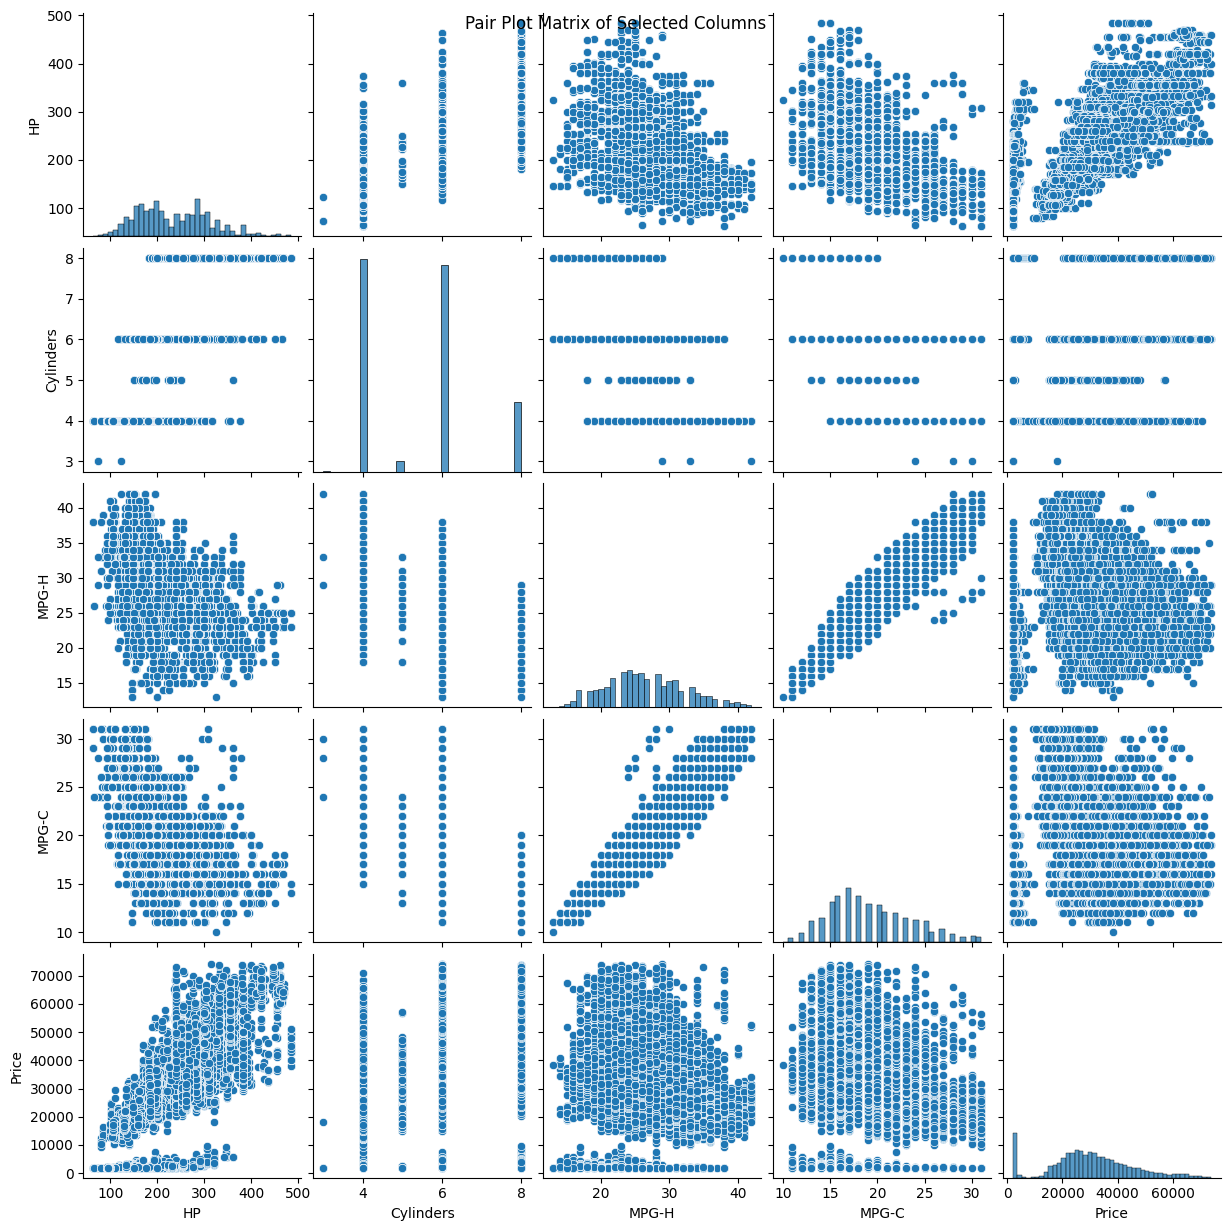

In [ ]:
# Scatter plot matrix for selected columns
scatter_columns = ['HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price']
sns.pairplot(df[scatter_columns])
plt.suptitle("Pair Plot Matrix of Selected Columns")
plt.show()

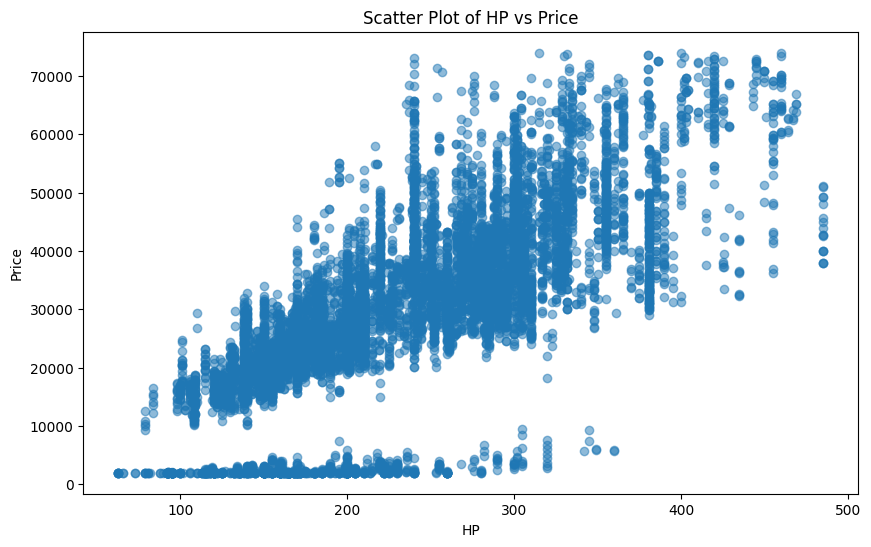

In [ ]:
# Scatter plot of HP vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['HP'], df['Price'], alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Price')
plt.title('Scatter Plot of HP vs Price')
plt.show()